In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset

data = pd.read_csv("Predict2.csv")

# Display the first few rows of the dataset
print("Dataset Head:")
print(data.head())

# Normalize predictor variable (independent variable)
def normalize(x):
    return (x - np.mean(x)) / np.std(x)

# Assuming the dataset has 'Predictor' and 'Response' columns
x = data['X']
y = data['Y']

x_normalized = normalize(x)
y = np.array(y)  # Convert response to numpy array for computations
x_normalized = np.array(x_normalized)  # Convert predictor to numpy array

# Add a column of ones to x for the bias term (intercept)
x_with_bias = np.c_[np.ones(x_normalized.shape[0]), x_normalized]

# Print normalized data information
print("\nNormalized Predictor and Response:")
print(f"Predictor : {x_normalized}")
print(f"Response : {y}")


Dataset Head:
     X        Y
0  9.1  0.99523
1  8.0  0.99007
2  9.1  0.99769
3  8.4  0.99386
4  6.9  0.99508

Normalized Predictor and Response:
Predictor : [ 0.60239429 -0.03598116  0.60239429  0.19615537 -0.67435661 -0.21008356
  4.37461286 -0.44222008 -0.61632248 -0.50025422  1.18273561  1.99521345
 -0.55828835  1.12470147  0.48632602 -0.09401529 -1.42880033 -1.0225614
 -0.79042488  1.356838    0.2541895  -0.38418595 -1.0225614  -1.54486859
  0.48632602  0.77649668 -0.32615182  2.22734998 -0.15204943 -0.38418595
  1.58897453  1.24076974 -1.08059553 -0.21008356  3.27196435 -0.03598116
 -0.79042488 -0.79042488 -0.61632248  0.13812123 -0.38418595  1.06666734
 -1.13862967 -0.61632248 -1.54486859  1.5309404  -0.26811769  0.48632602
  0.66042842 -0.84845901 -0.50025422 -0.03598116 -0.15204943 -0.09401529
 -0.61632248 -0.61632248 -0.26811769  0.60239429  0.54436016 -0.09401529
 -0.84845901  2.22734998 -0.90649314 -0.55828835  0.42829189 -0.32615182
 -0.21008356 -1.1966638   1.47290627 -0.

In [7]:
data.head

<bound method NDFrame.head of        X        Y
0    9.1  0.99523
1    8.0  0.99007
2    9.1  0.99769
3    8.4  0.99386
4    6.9  0.99508
..   ...      ...
95   7.8  0.99620
96  10.2  0.99760
97   6.1  0.99464
98   7.3  0.99830
99   7.3  0.99670

[100 rows x 2 columns]>

In [8]:
data.shape

(100, 2)

Iteration 0: Cost = 0.4966
Iteration 10: Cost = 0.0000
Iteration 20: Cost = 0.0000
Iteration 30: Cost = 0.0000
Iteration 40: Cost = 0.0000
Iteration 49: Cost = 0.0000

Final weights (theta): [0.9966201 0.0013402]
Final cost: 1.1947898109836582e-06


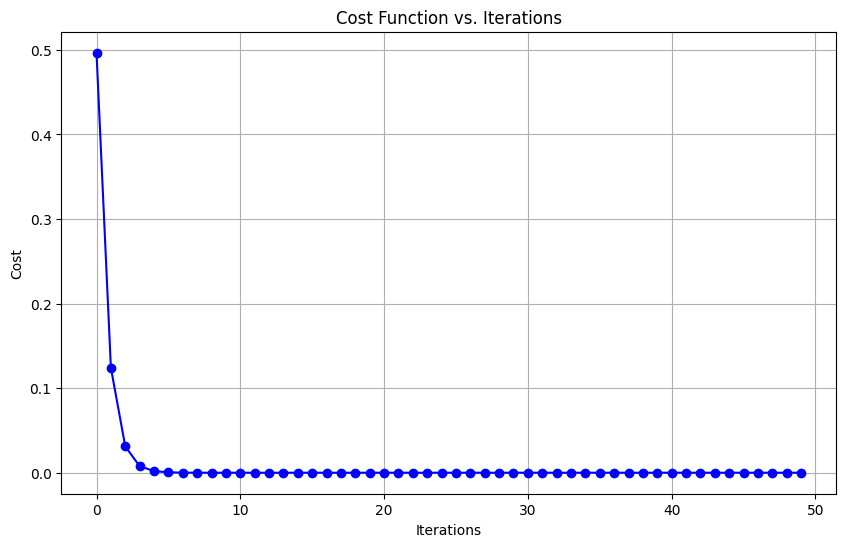

In [9]:
# Implement Batch Gradient Descent
def batch_gradient_descent(x, y, learning_rate, iterations):
    m, n = x.shape  # m: number of samples, n: number of features
    theta = np.zeros(n)  # Initialize weights (including bias)
    cost_history = []

    for i in range(iterations):
        predictions = np.dot(x, theta)
        errors = predictions - y
        gradient = (1 / m) * np.dot(x.T, errors)
        theta -= learning_rate * gradient

        # Compute cost
        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        cost_history.append(cost)

        # Debugging information
        if i % 10 == 0 or i == iterations - 1:
            print(f"Iteration {i}: Cost = {cost:.4f}")

    return theta, cost_history

# Parameters
learning_rate = 0.5
iterations = 50

# Run gradient descent
theta, cost_history = batch_gradient_descent(x_with_bias, y, learning_rate, iterations)

# Output results
print("\nFinal weights (theta):", theta)
print("Final cost:", cost_history[-1])

# Plot cost vs iterations
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, marker='o', linestyle='-', color='b')
plt.title("Cost Function vs. Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()


In [10]:
def batch_gradient_descent_with_convergence(x, y, learning_rate, max_iterations, tolerance=1e-6):
    m, n = x.shape  # m: number of samples, n: number of features
    theta = np.zeros(n)  # Initialize weights (including bias)
    cost_history = []
    prev_cost = float('inf')  # Large initial value for cost
    
    for i in range(max_iterations):
        predictions = np.dot(x, theta)
        errors = predictions - y
        gradient = (1 / m) * np.dot(x.T, errors)
        theta -= learning_rate * gradient

        # Compute cost
        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        cost_history.append(cost)

        # Check convergence
        if abs(prev_cost - cost) < tolerance:
            print(f"Convergence reached at iteration {i}")
            break
        prev_cost = cost

    return theta, cost_history

# Run gradient descent with convergence check
learning_rate = 0.5
max_iterations = 100  # Set to a high value to allow convergence
tolerance = 1e-6

theta, cost_history = batch_gradient_descent_with_convergence(x_with_bias, y, learning_rate, max_iterations, tolerance)

# Output results
print("\nFinal weights (theta):", theta)
print("Final cost:", cost_history[-1])


Convergence reached at iteration 11

Final weights (theta): [0.99637678 0.00133987]
Final cost: 1.3131948455078304e-06


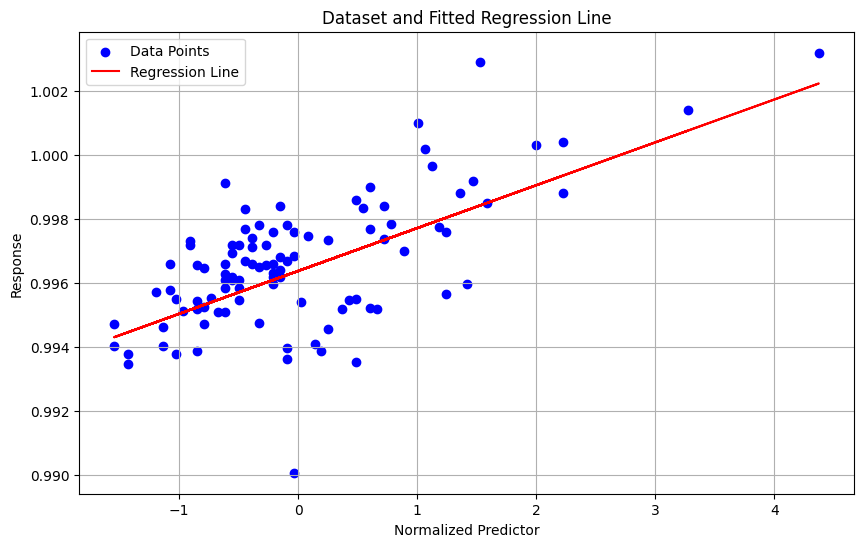

In [11]:
# Plot dataset and regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_normalized, y, color='blue', label='Data Points')

# Regression line
regression_line = theta[0] + theta[1] * x_normalized
plt.plot(x_normalized, regression_line, color='red', label='Regression Line')

plt.title("Dataset and Fitted Regression Line")
plt.xlabel("Normalized Predictor")
plt.ylabel("Response")
plt.legend()
plt.grid(True)
plt.show()


Testing learning rate: 0.005


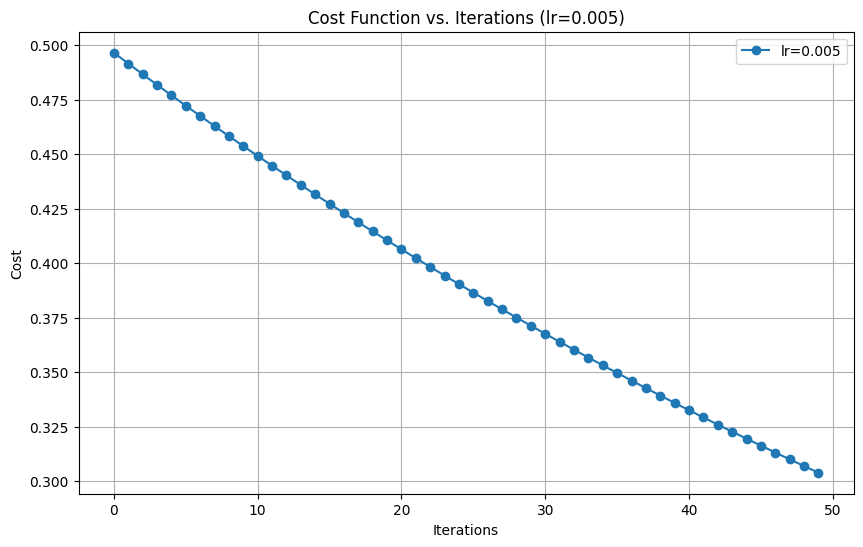

Final weights (theta) for lr=0.005: [0.22093816 0.0002971 ]
Final cost for lr=0.005: 0.30387410592239167

Testing learning rate: 0.5
Convergence reached at iteration 11


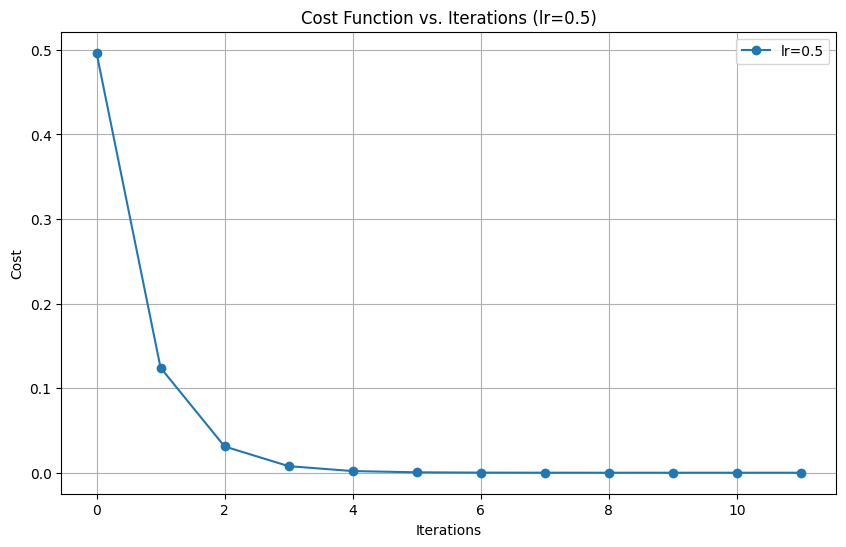

Final weights (theta) for lr=0.5: [0.99637678 0.00133987]
Final cost for lr=0.5: 1.3131948455078304e-06

Testing learning rate: 5


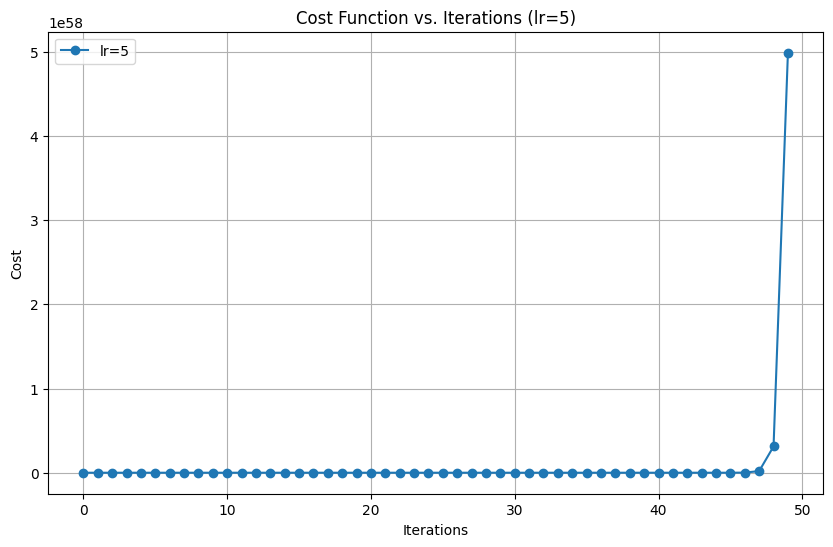

Final weights (theta) for lr=5: [-1.26336607e+30 -1.69890029e+27]
Final cost for lr=5: 4.987802212332242e+58


In [12]:
# Test different learning rates
learning_rates = [0.005, 0.5, 5]
max_iterations = 50

for lr in learning_rates:
    print(f"\nTesting learning rate: {lr}")
    theta, cost_history = batch_gradient_descent_with_convergence(x_with_bias, y, lr, max_iterations)

    # Plot cost vs iterations
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(cost_history)), cost_history, marker='o', linestyle='-', label=f"lr={lr}")
    plt.title(f"Cost Function vs. Iterations (lr={lr})")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Output final cost and theta
    print(f"Final weights (theta) for lr={lr}: {theta}")
    print(f"Final cost for lr={lr}: {cost_history[-1]}")


In [1]:
# Implement Mini-Batch Gradient Descent
def mini_batch_gradient_descent(x, y, learning_rate, max_iterations, batch_size):
    m, n = x.shape  # m: number of samples, n: number of features
    theta = np.zeros(n)  # Initialize weights (including bias)
    cost_history = []

    for i in range(max_iterations):
        indices = np.random.permutation(m)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        for start in range(0, m, batch_size):
            end = start + batch_size
            x_batch = x_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            predictions = np.dot(x_batch, theta)
            errors = predictions - y_batch
            gradient = (1 / batch_size) * np.dot(x_batch.T, errors)
            theta -= learning_rate * gradient

        # Compute cost for the entire dataset
        predictions = np.dot(x, theta)
        errors = predictions - y
        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        cost_history.append(cost)

    return theta, cost_history

# Parameters
learning_rate = 0.5
max_iterations = 50
batch_size = 10

# Run batch gradient descent
theta_batch, cost_history_batch = batch_gradient_descent_with_convergence(x_with_bias, y, learning_rate, max_iterations)

# Run stochastic gradient descent
theta_sgd, cost_history_sgd = stochastic_gradient_descent(x_with_bias, y, learning_rate, max_iterations)

# Run mini-batch gradient descent
theta_mbgd, cost_history_mbgd = mini_batch_gradient_descent(x_with_bias, y, learning_rate, max_iterations, batch_size)

# Plot cost function vs iterations for all methods
plt.figure(figsize=(12, 8))
plt.plot(range(len(cost_history_batch)), cost_history_batch, label="Batch Gradient Descent", marker='o')
plt.plot(range(len(cost_history_sgd)), cost_history_sgd, label="Stochastic Gradient Descent", marker='x')
plt.plot(range(len(cost_history_mbgd)), cost_history_mbgd, label="Mini-Batch Gradient Descent", marker='s')
plt.title("Cost Function vs. Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'batch_gradient_descent_with_convergence' is not defined